# 1. Importing the required libraries

For the second laboratory excercise of the subject Machine Learning, I will use 
California Housing Dataset.

In [72]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import numpy as np #Library for numerical calculations
import pandas as pd #Library for data analysis and reading data from files
from scipy import stats #library for statistical analysis
from sklearn import datasets #libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler #Min max Scaler for normalization of data to range [0,1]
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge #Importing the linear regression models
from sklearn.metrics import mean_squared_error #For evaluation of the models
%matplotlib notebook

# 2. Loading the California Housing Dataset

In [11]:
data = pd.read_csv('california_housing_train.csv')

In [19]:
column_names = np.loadtxt(open("california_housing_train.csv", "rb"), delimiter=",", max_rows=1, dtype = str) #The first row usually represents the column names so we can read them like this

X = data[:,:-1].astype(np.float) 
y = data[:,-1].astype(np.float) 

N = X.shape[0]
number_of_features = X.shape[1]
feature_names = column_names[:-1]

print(X.shape)
print(y.shape)

(17000, 8)
(17000,)


In [12]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400
7,-114.59,34.83,41,812,168,375,158,1.7083,48500
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100


In [13]:
data.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

# 3. Visualizations

### 3.1 Feature and Target Variable Histograms

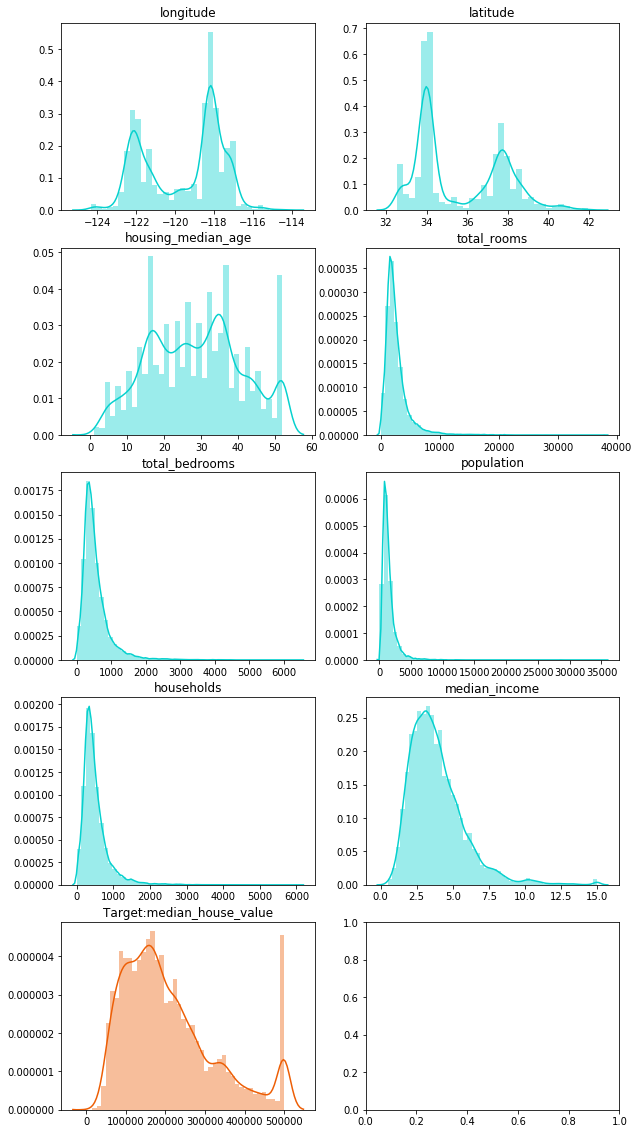

In [31]:
fig = plt.figure(figsize=(10, 20))
fig.subplots(number_of_features//2+1, ncols=2)
for feat_i in range(number_of_features): 
    ax = plt.subplot(number_of_features//2+1,2, feat_i+1)
    plt.title(column_names[feat_i]) 
    sns.distplot(X[:,feat_i], color = "#06d1ce")
    
ax = plt.subplot(number_of_features//2+1,2, feat_i+2)
plt.title("Target:" + column_names[-1]) 
sns.distplot(y, color = "#ed5e05")
plt.show()

### 3.2 Feature with feature scatterplots

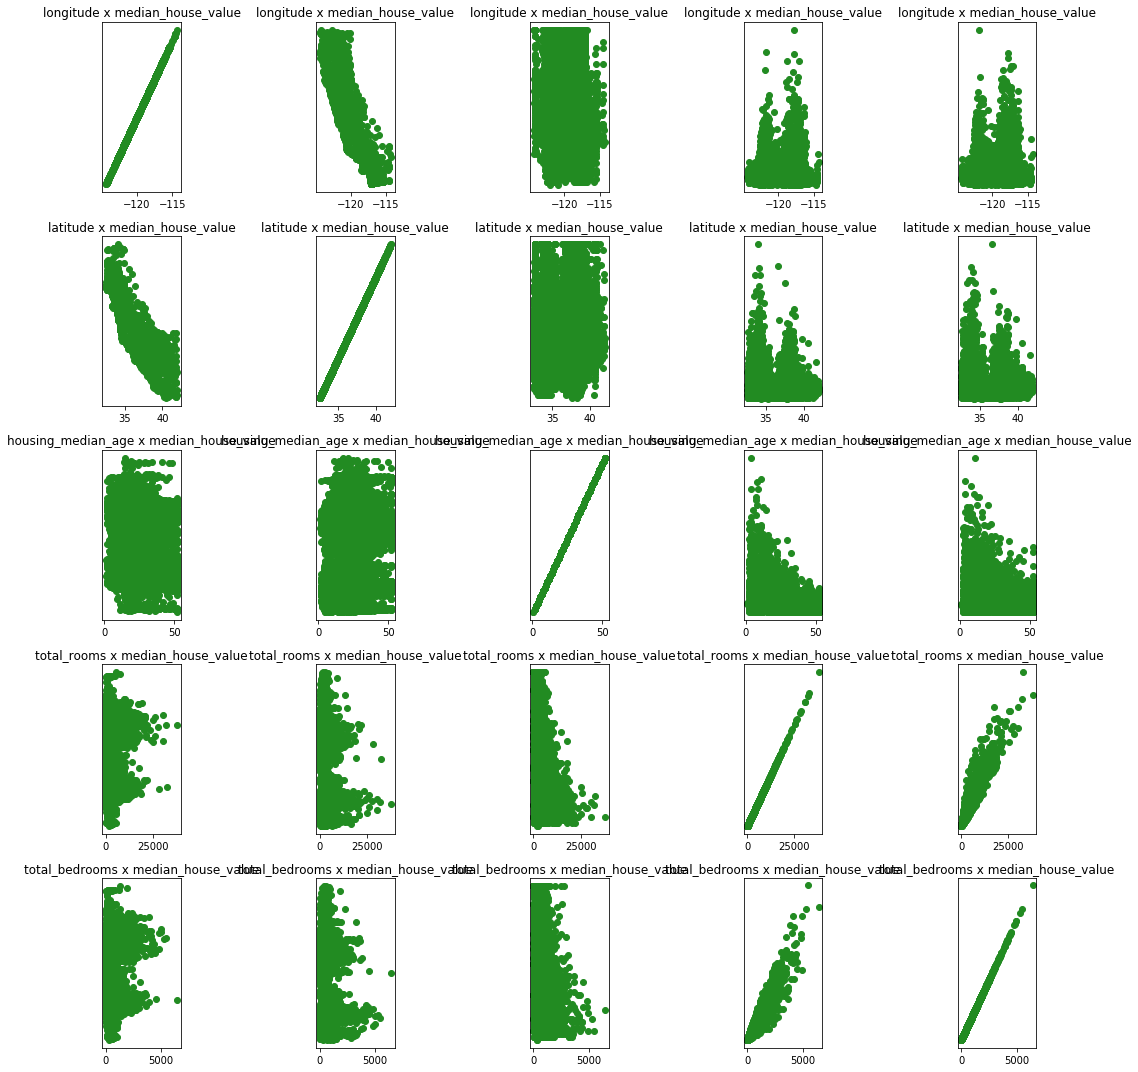

In [66]:
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=number_of_features-3, ncols=number_of_features-3)
for feat_i in range(number_of_features-3): 
    for feat_j in range(number_of_features-3):  
        ax = plt.subplot(number_of_features-3,number_of_features-3,(number_of_features-3)*feat_i + feat_j+1)
        plt.scatter(X[:,feat_i], X[:, feat_j], color="forestgreen") 
        plt.yticks(())
        plt.space = 3
        plt.title(column_names[feat_i]+" x "+column_names[-1])
plt.tight_layout()
plt.show()

### 3.3 Feature with Target scatterplots

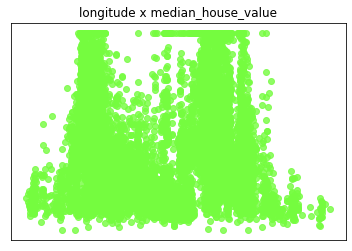

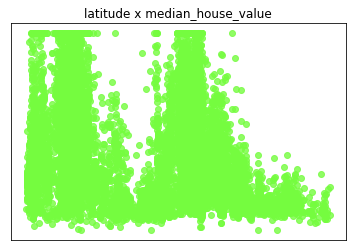

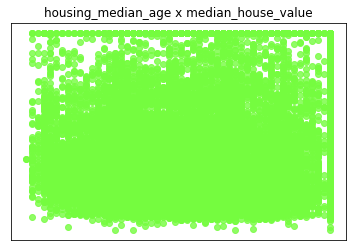

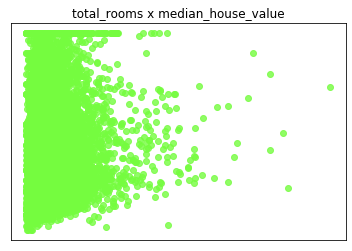

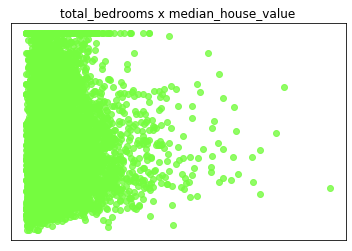

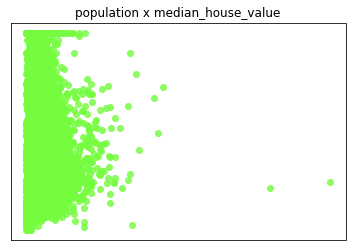

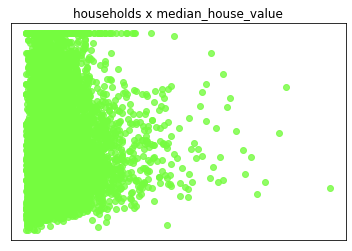

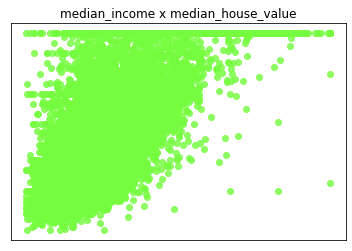

In [68]:
for feat_i in range(number_of_features):
    plt.figure()
    plt.scatter( X[:,feat_i], y, alpha=.8, color = "#75fc3f")
    plt.xticks(())
    plt.yticks(())
    ax.axis('equal')
    plt.title(column_names[feat_i] + " x " + column_names[-1])
    plt.show()

### 3.4 Feature with Target KDE joint plots

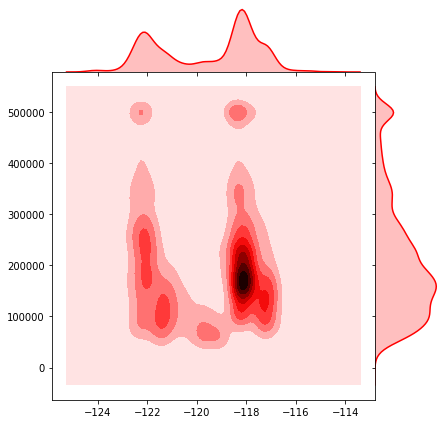

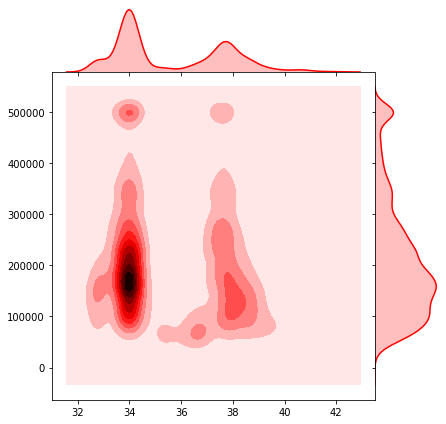

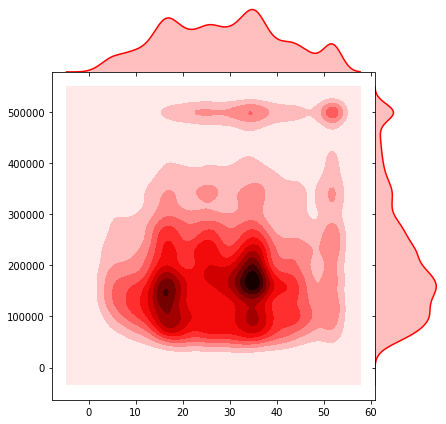

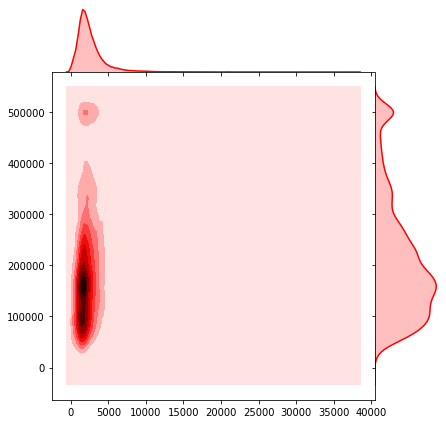

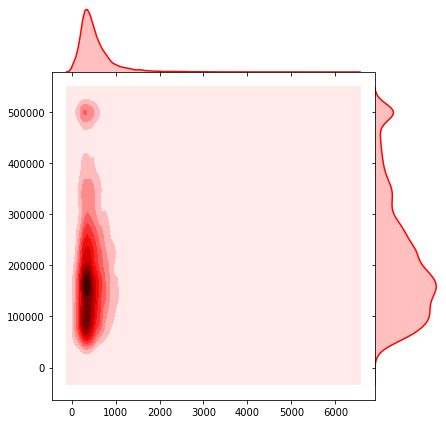

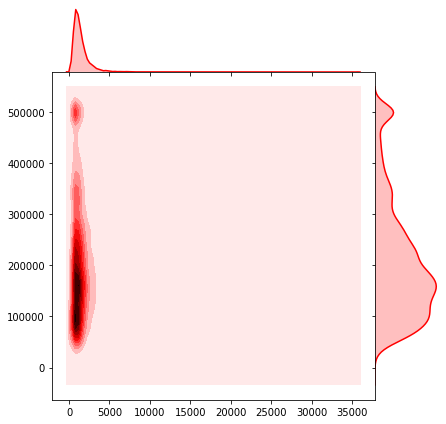

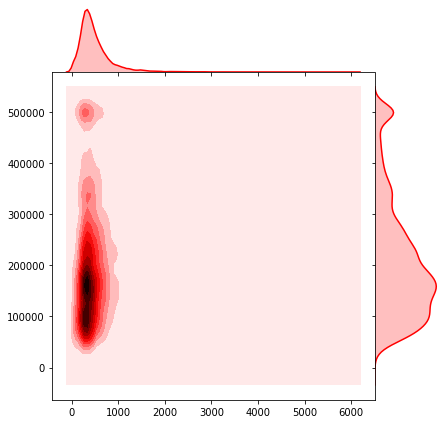

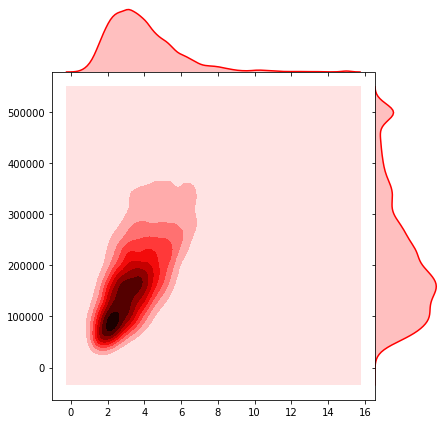

In [70]:
for feat_i in range(number_of_features):
    sns.jointplot(X[:,feat_i], y, kind="kde", space=0, color="red")
plt.show()

# 4. Min-Max normalization of the data

In [73]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 5. Regression

### 5.1 Linear Regression

In [81]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[ -432032.61307345  -402861.53315802    57445.78825124  -343217.74565123
   718794.45582471 -1193950.47400797   256476.08022021   582913.75454016]
Intercept W0
368061.49624426855
Error
4830762847.990619


### 5.2 Ridge Regression

In [83]:
reg = Ridge(alpha = 10).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[-351238.55630655 -329775.84382122   64354.06632598  -36924.35595648
  170984.51871418 -223129.31112523   92708.3050506   541637.98438741]
Intercept W0
310367.27832155593
Error
5354268216.240661


### 5.3 Lasso Regression

In [84]:
reg = Lasso(alpha = 0.1).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_)
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[ -432034.11399363  -402863.81426888    57448.66063407  -342698.78315937
   718509.28229928 -1193385.42481161   256043.52228741   582864.4431209 ]
Intercept W0
368073.46696820867
Error
4830893206.360447


# 6. Credits

Andrej Angelovski 161529